<a href="https://colab.research.google.com/github/ChaytiSaha/Covid-19-prediction-perspective-BD/blob/main/fb_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel("Covid-19 dataset for Bangladesh.xlsx")
print(df.shape)
df.head(10)

(299, 7)


,Date,Testing sample per day,Detected per day,Total detected,Recovery per day,Death per day,Total Death
0,2020-03-08,4,3,3,0.0,0,0
1,2020-03-09,5,0,3,0.0,0,0
2,2020-03-10,127,0,3,0.0,0,0
3,2020-03-11,10,0,3,0.0,0,0
4,2020-03-12,21,0,3,0.0,0,0
5,2020-03-13,24,0,3,2.0,0,0
6,2020-03-14,24,0,3,0.0,0,0
7,2020-03-15,20,2,5,0.0,0,0
8,2020-03-16,10,3,8,0.0,0,0
9,2020-03-17,36,0,8,0.0,0,0


In [ ]:
df['Date']

0     2020-03-08
1     2020-03-09
2     2020-03-10
3     2020-03-11
4     2020-03-12
         ...    
294   2020-12-27
295   2020-12-28
296   2020-12-29
297   2020-12-30
298   2020-12-31
Name: Date, Length: 299, dtype: datetime64[ns]

In [ ]:
#from pandas import to_datetime
#df['Date']= to_datetime(df['Date'])
#df['Date']

In [ ]:
df_detected = df[["Date","Detected per day"]]
df_detected.columns = ['ds', 'y']
df_detected.ffill(inplace=True)
df_detected

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,ds,y
0,2020-03-08,3
1,2020-03-09,0
2,2020-03-10,0
3,2020-03-11,0
4,2020-03-12,0
...,...,...
294,2020-12-27,1049
295,2020-12-28,932
296,2020-12-29,1181
297,2020-12-30,1235


In [ ]:
df_death = df[["Date","Death per day"]]
df_death.columns = ['ds', 'y']
df_death.ffill(inplace=True)
df_death.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,ds,y
0,2020-03-08,0
1,2020-03-09,0
2,2020-03-10,0
3,2020-03-11,0
4,2020-03-12,0


In [ ]:
df_recovery = df[["Date","Recovery per day"]]
df_recovery.columns = ['ds', 'y']
df_recovery.ffill(inplace=True)
df_recovery.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,ds,y
0,2020-03-08,0.0
1,2020-03-09,0.0
2,2020-03-10,0.0
3,2020-03-11,0.0
4,2020-03-12,0.0


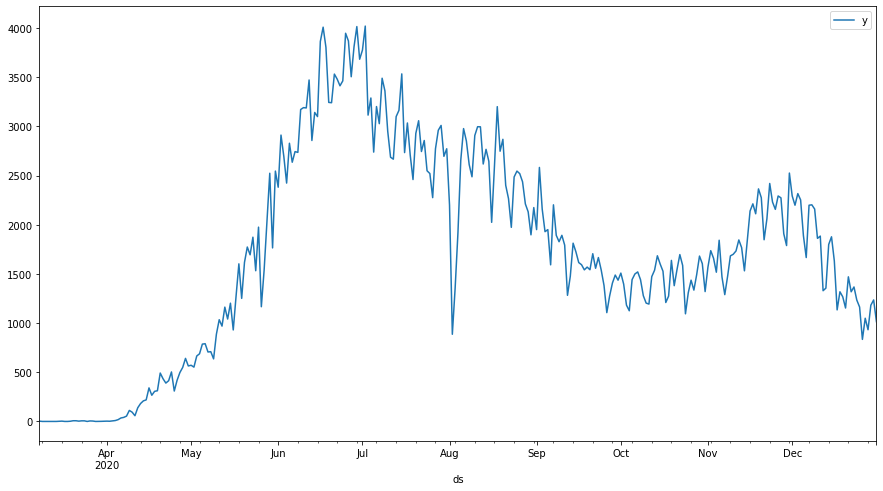

In [ ]:
# plot the time series
from matplotlib import pyplot
df_detected.plot('ds', figsize=(15,8))

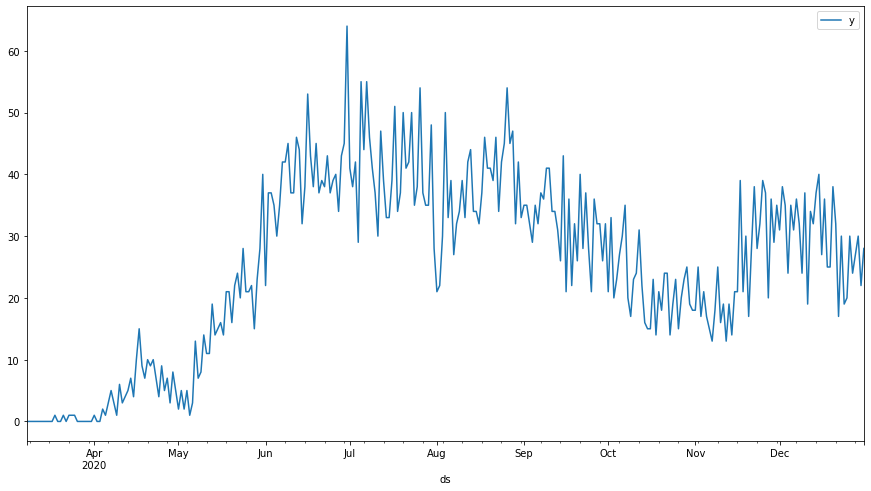

In [ ]:
df_death.plot('ds', figsize=(15,8))

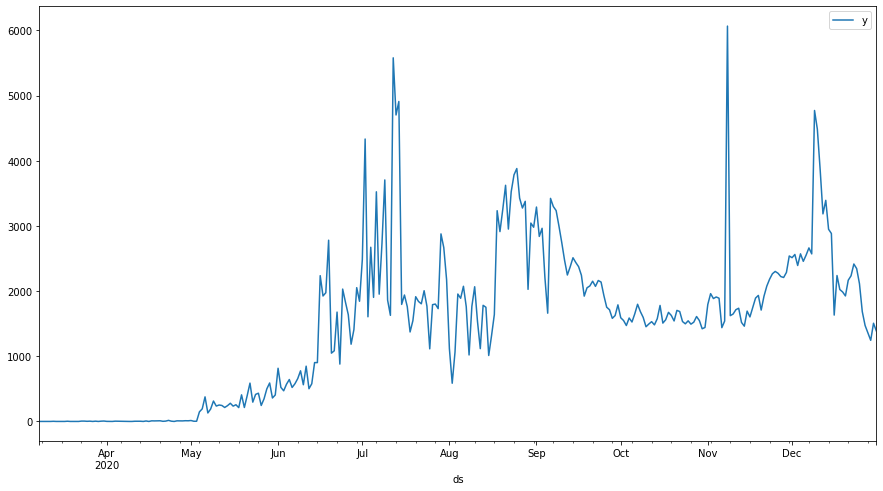

In [ ]:
df_recovery.plot('ds', figsize=(15,8))

In [ ]:
from fbprophet import Prophet
# define the model
m_detected = Prophet()
m_death = Prophet()
m_recovery = Prophet()


# fit the model
m_detected.fit(df_detected)
m_death.fit(df_death)
m_recovery.fit(df_recovery)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#cross validation and accuracy measurement

In [ ]:
from fbprophet.diagnostics import cross_validation
death_p = cross_validation(m_death, initial='180 days', period='25 days', horizon = '50 days')
death_p

INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-09-22 00:00:00 and 2020-11-11 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-09-23,35.619063,26.894163,44.895394,37,2020-09-22
1,2020-09-24,36.206009,27.994144,44.979353,28,2020-09-22
2,2020-09-25,34.222044,25.681183,43.417865,21,2020-09-22
3,2020-09-26,32.738077,23.599293,41.346336,36,2020-09-22
4,2020-09-27,35.171000,26.709482,43.727049,32,2020-09-22
...,...,...,...,...,...,...
145,2020-12-27,7.531108,-0.980909,16.651964,24,2020-11-11
146,2020-12-28,8.034246,-1.138371,17.019618,27,2020-11-11
147,2020-12-29,9.123104,0.295117,18.510326,30,2020-11-11
148,2020-12-30,7.769611,-2.178323,16.682659,22,2020-11-11


In [ ]:
from fbprophet.diagnostics import performance_metrics
forecast_death_p = performance_metrics(death_p)
forecast_death_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,5 days,43.296958,6.580042,5.325930,0.274482,0.161577,0.800000
1,6 days,65.786102,8.110863,6.286295,0.274968,0.161577,0.733333
2,7 days,69.426828,8.332276,6.453890,0.282908,0.174179,0.666667
3,8 days,63.204915,7.950152,6.058872,0.239500,0.161577,0.733333
4,9 days,83.817755,9.155204,7.279662,0.318638,0.174179,0.600000


In [ ]:
forecast_death_p.mean(axis=0)

horizon     27 days 12:00:00
mse                    199.6
rmse                 13.8631
mae                  12.1637
mape                0.505513
mdape               0.489359
coverage             0.33913
dtype: object

In [ ]:
detected_p = cross_validation(m_detected, initial='180 days', period='25 days', horizon = '50 days')
detected_p

INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-09-22 00:00:00 and 2020-11-11 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-09-23,1758.500444,1347.381679,2181.878924,1666,2020-09-22
1,2020-09-24,1702.461033,1267.306364,2115.030236,1540,2020-09-22
2,2020-09-25,1612.952708,1158.450831,2020.059015,1383,2020-09-22
3,2020-09-26,1427.169885,979.716364,1847.393408,1106,2020-09-22
4,2020-09-27,1367.036467,942.365596,1796.167436,1275,2020-09-22
...,...,...,...,...,...,...
145,2020-12-27,269.708365,-281.762188,871.464510,1049,2020-11-11
146,2020-12-28,471.093023,-33.952622,1027.363262,932,2020-11-11
147,2020-12-29,470.975304,-91.896464,1082.490648,1181,2020-11-11
148,2020-12-30,527.886035,15.105469,1100.739089,1235,2020-11-11


In [ ]:
forecast_detected_p = performance_metrics(detected_p)
forecast_detected_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,5 days,280136.826887,529.279536,444.752283,0.268822,0.289704,0.533333
1,6 days,348985.549532,590.749989,494.095442,0.288147,0.290389,0.466667
2,7 days,368467.084115,607.014896,490.333017,0.283053,0.290389,0.533333
3,8 days,459914.917749,678.170272,547.567650,0.303056,0.309759,0.466667
4,9 days,505695.482341,711.122691,557.356702,0.294177,0.309759,0.466667


In [ ]:
forecast_detected_p.mean(axis=0)

horizon     27 days 12:00:00
mse               1.0263e+06
rmse                 991.057
mae                  860.221
mape                0.479341
mdape               0.508646
coverage             0.27971
dtype: object

In [ ]:
recovery_p = cross_validation(m_recovery, initial='180 days', period='25 days', horizon = '50 days')
recovery_p

INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-09-22 00:00:00 and 2020-11-11 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-09-23,3074.129513,2184.057111,4006.785055,2163.0,2020-09-22
1,2020-09-24,3220.865294,2325.594276,4090.762241,2139.0,2020-09-22
2,2020-09-25,3008.106250,2034.903368,3843.153618,1932.0,2020-09-22
3,2020-09-26,2719.212700,1795.588888,3649.446117,1753.0,2020-09-22
4,2020-09-27,3050.926231,2149.382672,3993.798248,1714.0,2020-09-22
...,...,...,...,...,...,...
145,2020-12-27,1681.091534,754.013445,2613.117643,1473.0,2020-11-11
146,2020-12-28,1661.842127,716.829988,2555.264512,1357.0,2020-11-11
147,2020-12-29,1670.178017,707.132948,2558.315108,1245.0,2020-11-11
148,2020-12-30,1624.256941,675.393830,2551.386755,1507.0,2020-11-11


In [ ]:
forecast_recovery_p = performance_metrics(recovery_p)
forecast_recovery_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,5 days,518373.540701,719.981625,617.873779,0.346774,0.358410,0.666667
1,6 days,642077.353885,801.297294,665.177032,0.389068,0.358410,0.666667
2,7 days,713867.729204,844.906935,665.154505,0.399836,0.350431,0.666667
3,8 days,756478.907470,869.757959,675.041361,0.406838,0.350431,0.666667
4,9 days,915433.747011,956.783020,730.403153,0.449154,0.352648,0.666667


In [ ]:
forecast_recovery_p.mean(axis=0)

horizon     27 days 12:00:00
mse              1.62147e+06
rmse                 1246.54
mae                  997.172
mape                0.537933
mdape               0.333544
coverage            0.594203
dtype: object

In [ ]:
#predictions for future dates

In [ ]:
future_death= m_death.make_future_dataframe(periods=365)
future_detected= m_detected.make_future_dataframe(periods=365)
future_recovery= m_recovery.make_future_dataframe(periods=365)
future_death

,ds
0,2020-03-08
1,2020-03-09
2,2020-03-10
3,2020-03-11
4,2020-03-12
...,...
659,2021-12-27
660,2021-12-28
661,2021-12-29
662,2021-12-30


In [ ]:
forecast_death = m_death.predict(future_death)
forecast_death[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-08,-7.182398,-16.022731,2.403732
1,2020-03-09,-6.116948,-16.170787,2.804330
2,2020-03-10,-4.516426,-13.038663,5.270724
3,2020-03-11,-5.541055,-14.839781,3.533668
4,2020-03-12,-5.215874,-14.322503,3.841725
...,...,...,...,...
659,2021-12-27,21.029949,-35.514678,72.360181
660,2021-12-28,22.204155,-35.769489,74.808726
661,2021-12-29,20.753210,-35.195021,72.612306
662,2021-12-30,20.652075,-34.618355,71.388234


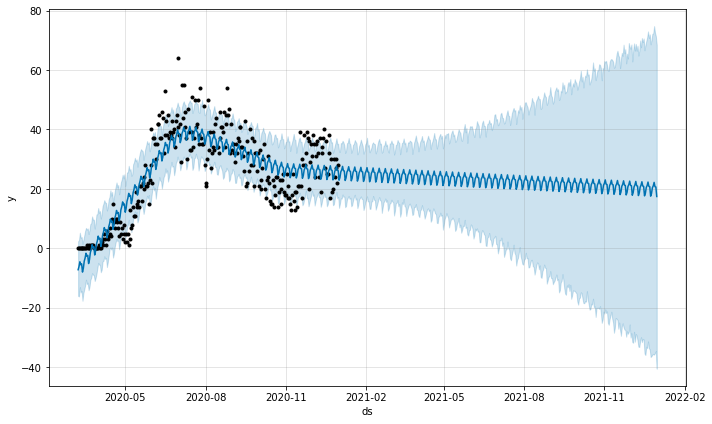

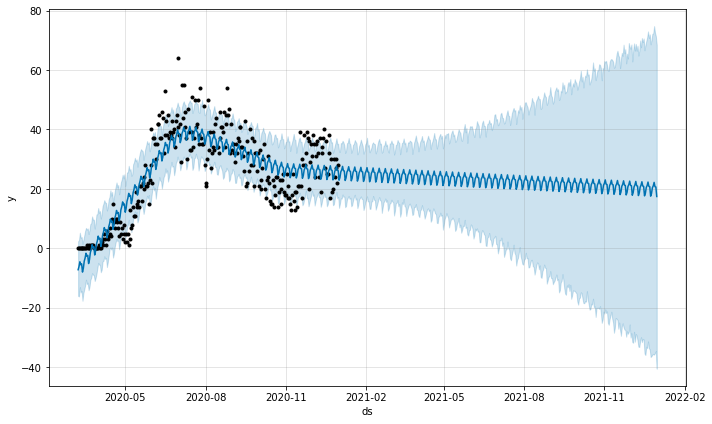

In [ ]:
### plot the predicted projection
m_death.plot(forecast_death)

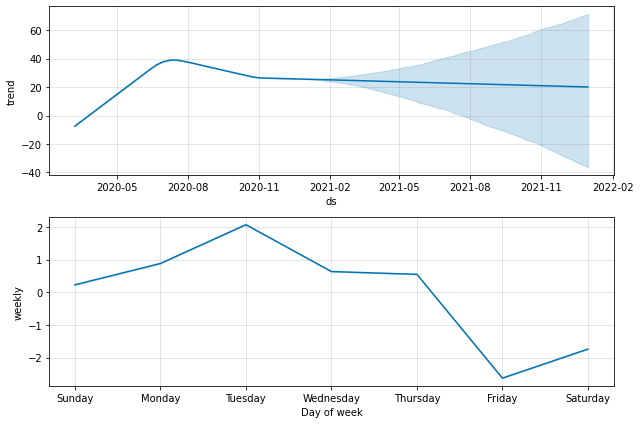

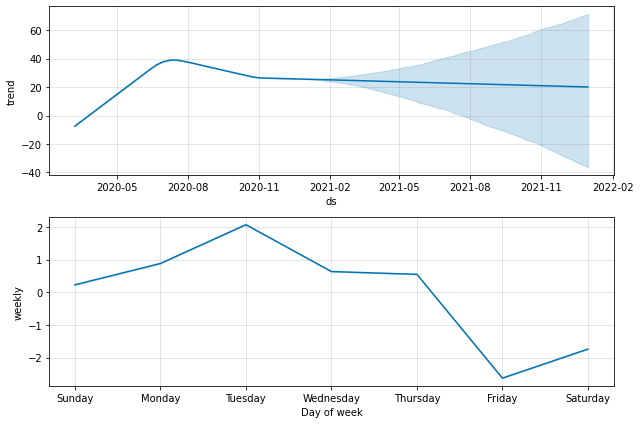

In [ ]:
#### Visualize Each Components[Trends,yearly]
m_death.plot_components(forecast_death)

In [ ]:
forecast_detected = m_detected.predict(future_detected)
forecast_detected[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-08,-861.565747,-1414.926373,-303.616494
1,2020-03-09,-588.997321,-1142.397940,5.307017
2,2020-03-10,-548.973783,-1078.153168,34.601970
3,2020-03-11,-467.488132,-1039.468192,95.167904
4,2020-03-12,-459.398918,-1005.887475,126.439440
...,...,...,...,...
659,2021-12-27,361.600491,-4568.030913,5438.008108
660,2021-12-28,364.634375,-4638.033139,5425.472108
661,2021-12-29,409.130372,-4667.646274,5556.594381
662,2021-12-30,380.229932,-4642.788046,5336.381632


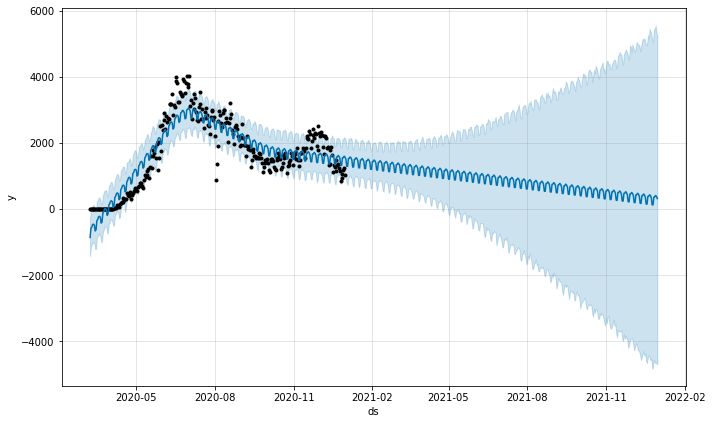

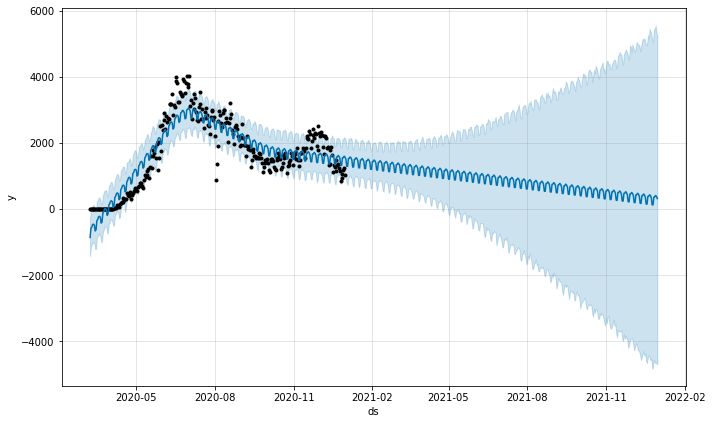

In [ ]:
m_detected.plot(forecast_detected)

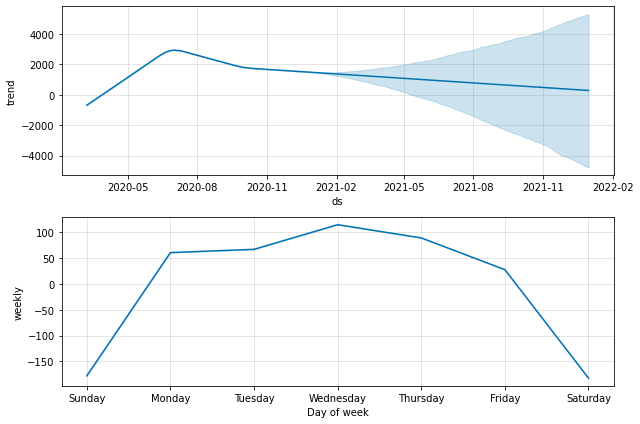

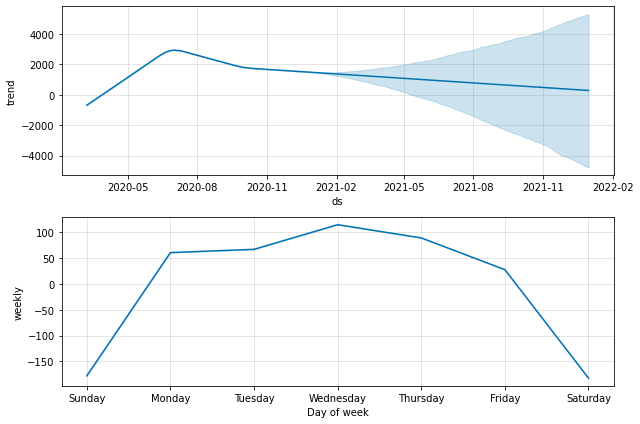

In [ ]:
m_detected.plot_components(forecast_detected)

In [ ]:
forecast_recovery = m_recovery.predict(future_recovery)
forecast_recovery[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-08,-385.422471,-1271.189735,512.540199
1,2020-03-09,-379.327844,-1408.709546,610.145080
2,2020-03-10,-351.597068,-1345.785830,527.140508
3,2020-03-11,-331.602872,-1228.762929,624.418091
4,2020-03-12,-233.741177,-1153.353949,731.349104
...,...,...,...,...
659,2021-12-27,2459.133297,756.177375,4189.085347
660,2021-12-28,2470.316403,839.481313,4130.623145
661,2021-12-29,2473.762931,887.487388,4077.512464
662,2021-12-30,2555.076956,912.934857,4274.839609


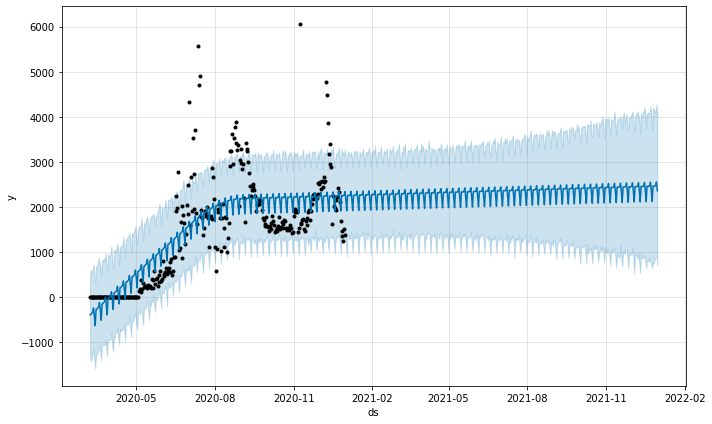

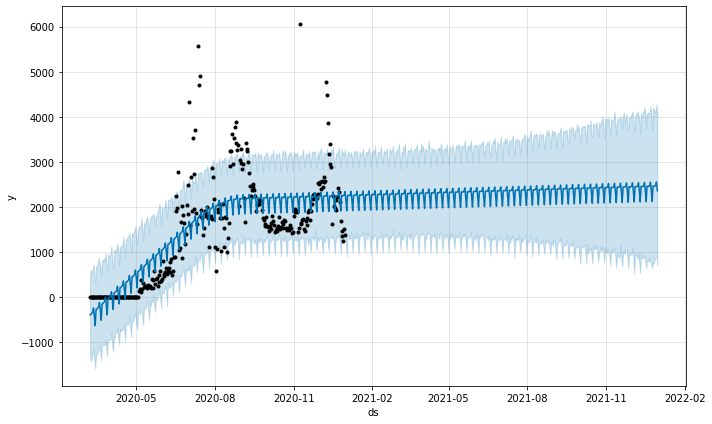

In [ ]:
m_recovery.plot(forecast_recovery)

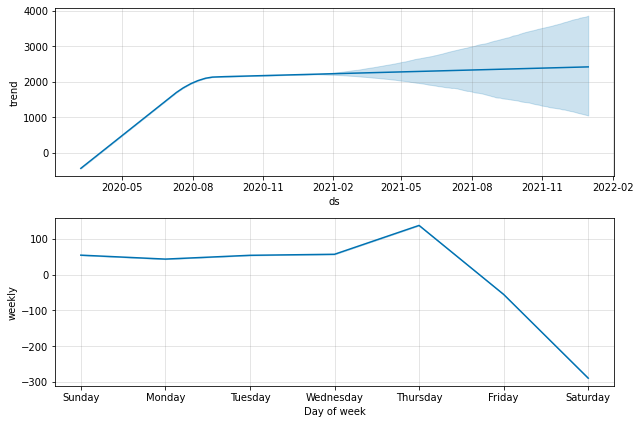

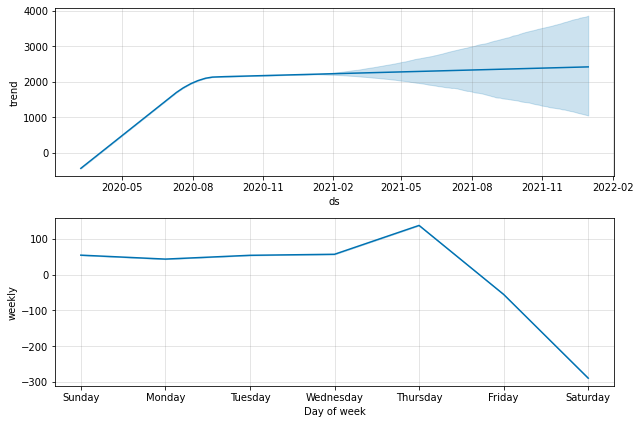

In [ ]:
m_recovery.plot_components(forecast_recovery)